In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 샘플링 편향

In [2]:
# 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트를 만들기
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

In [3]:
fish_target = [1]*35 + [0]*14

하나의 생선 데이터를 sample이라고 한다.도미와 빙어는 각각 35마리, 14마리가 있으므로 전체 데이터는 49개의 샘플이 있다. 사용하는 특성은 길이와 무게 총 2개이다. 이 데이터의 처음 35를 훈련 세트로, 나머지 14개를 테스트 세트로 사용하기

In [4]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [5]:
fish_data[5]

[29.7, 450.0]

In [6]:
# 슬라이싱 시 마지막 인덱스의 원소는 포함되지 않음
fish_data[0:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [7]:
# 35와 14개를 선택하기 35개를 훈련 세트로, 13개를 테스트 세트로
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [8]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

정확도가 0이 나왔는데??

도미가 35개, 빙어가 14개였다는 사실. 테스트 세트에 빙어만 들어가 있기 때문에 정확도가 0이 나왔다. 일반적으로 훈련 데이터와 테스트 데이터에는 도미와 빙어가 골고루 섞여 있어야 한다. 훈려 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미로 '샘플링 편향'이라고 부른다. 

📍특정 종류의 샘플이 과도하게 많은 샘플링 편향을 가지고 있으면 문제가 된다. 훈련 세트와 데이터 세트를 나누기 전에

    데이터를 섞든지
    골고루 샘플을 뽑든지
    
훈련 세트와 데이터 세트를 만들어야 한다. **넘파이 라이브러리**로 해당 작업을 간편하게 처리할 수 있다. 

# 넘파이(numpy)
> 고차원 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구를 많이 제공한다.

💡차원이라는 말은 조금씩 다른 의미로 쓰일 수 있는데, 배열에서 차원은 좌표계의 축과 같다. 

1차원 배열은 선이고, 2차원 배열은 면, 3차원 배열은 공간을 나타낸다.

편의를 위해 보통의 xy좌표계와는 달리 시작점이 왼쪽 아래가 아닌 왼쪽 위에서 시작한다. 

In [9]:
# 생선 데이터를 2차원 넘파이 배열로 변환하기
import numpy as np

In [10]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [11]:
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


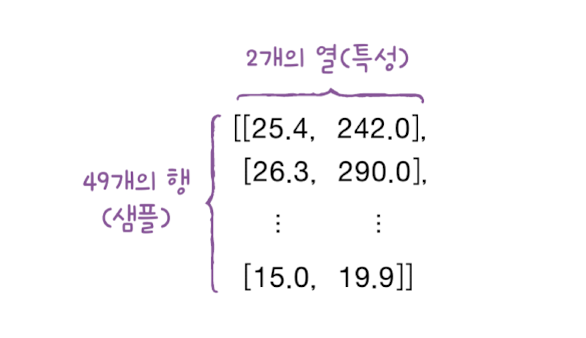

📍 이렇게 넘파이는 차원을 구분하기 쉽도록 행과 열을 가지런히 출력한다. 

In [12]:
# shape속성을 통해 (샘플 수, 특성 수)를 확인할 수 있다. 
input_arr.shape

(49, 2)

배열에서 랜덤하게 샘플을 선택해 훈련 세트와 테스트 세트로 만들어야 한다. 

    무작위로 샘플을 고르는 방식으로 
    
🚨주의

    input_arr와 target_arr에서 같은 위치는 함께 선택되어야 한다는 점! 
    input_arr의 두 번째 값은 훈련 세트로 가고, target_arr의 두 번째 값은 테스트 세트로 가면 안된다. 타깃이 샘플과 함께 이동해야 한다. 항상 인덱스값을 기억할 수는 없으니, 아예 인덱스를 섞은 다음 input_arr와 target_arr에서 샘플을 무작위로 선택하면 된다. 

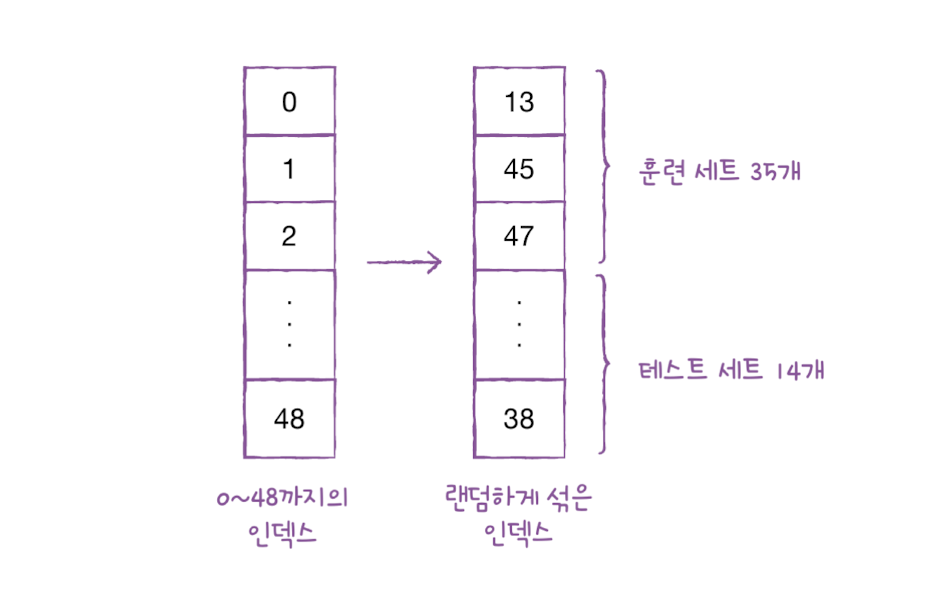

📍넘파이 arrange()함수는 일정한 간격의 정수 또는 실수 배열을 만든다. 기본 간격은 1이고, 매개변수가 하나이면 종료 숫자를 의미한다. np.arange(3)은 0에서 종료 숫자 3 직전까지 배열을 만든다. `[0, 1, 2]` 그래서 arange()를 이용하면 0 - 48까지 1씩 증가하는 인덱스를 간단히 만들 수 있다. 그 후 이 인덱스를 랜덤하게 섞으면 된다!

📍넘파이에서 무작위 결과를 만드는 함수들은 실행할 때마다 다른 결과를 만들기 때문에, 일정한 결과를 위해 초기에 랜덤 시드(random seed)를 지정해야 한다.

📍shuffle()함수는 주어진 배열을 랜덤하게 섞는데, 다차원 배열일 경우에는 첫번째 축(행)에 대해서만 섞는다. 
```python
arr = np.arr([[1, 2], [3, 4], [5, 6]])
np.random.shuffle(arr)
print(arr)

>>> [[3 4]
     [5 6]
     [1 2]]
```

In [13]:
# 0에서부터 N-1까지 1씩 증가하는 배열 만들기
np.random.seed(42)
index = np.arange(49)

# 주어진 배열을 무작위로 섞기
np.random.shuffle(index)
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

넘파이는 슬라이싱 외에 배열 인덱싱(array indexing) 기능을 제공한다. 
배열 인덱싱은 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택할 수 있다. 

In [14]:
# 배열 인덱싱으로 input_arr에서 두 번째와 네 번째 샘플을 선택하여 출력하기
input_arr[[1, 3]]

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [15]:
# 리스트 대신 넘파이 배열을 인덱스로 전달하기
# train set 만들기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [25]:
# test set 만들기
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

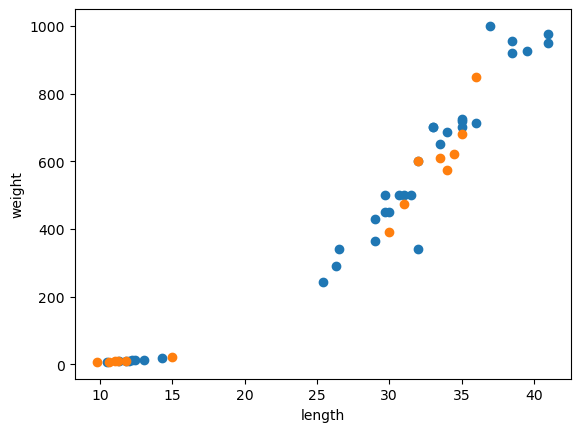

In [26]:
# 훈련 세트와 테스트 세트에 도미와 빙어가 잘 섞여 있는지 산점도로 확인하기
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 파란색이 훈련 세트, 주황색이 테스트 세트
# 양족에 도미와 빙어가 모두 섞여 있음을 확인할 수 있다. 

# 두 번째 머신러닝 프로그램

fit()메서드를 실행할 때마다 KNeighborsClassifier클래스의 객체는 이전에 학습한 것을 모두 잃어버린다. 이전 모델을 그대로 두고 싶다면 클래스 객체를 새로 만들어야 한다. 

In [27]:
kn = kn.fit(train_input, train_target)

In [28]:
kn.score(test_input, test_target)

1.0

In [29]:
# 테스트 세트의 예측
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [30]:
# 실제 타깃
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

동일하게 array()로 감싸 있는데, 이 값은 넘파이 배열을 의미한다. 즉, predict()가 반환하는 값은 단순한 파이썬 리스트가 아니라 넘파이 배열이다. 

**📌사이킷런 모델의 입력과 출력은 모두 넘파이 배열이다. 넘파이는 많은 파이썬 과학 라이브러리에서 사용하는 표준 데이터이다.**

# 훈련 모델 평가 
모델을 훈련할 대, 사용한 데이터로 모델의 성능을 평가하는 것은 정답을 미리 알려주고 시험을 보는 것과 같다. 공정하게 점수를 매기기 위해서는 훈련에 참여하지 않은 샘플을 사용해야 한다. 